## Reinforcement Learning

强化学习的几个组成部分:  
* **Agent**, agents learn to take actions to maximize expected reward.
* **Action**, change the environment.
* **Environment**, the place where agents are expected to maximize expected reward.
* **Reward**, a feedback from pre-defined rule or reward model.
* **Observation**, agents 对当前环境 state 的观察, 注意 state 不总是等于 observation, 比如在象棋游戏中, 当前棋盘的 state 就是 agents 的 observation, 在扑克牌中, 当前棋盘的 state 就是打出的牌和所有 agents 手里的牌, 但 observation 是 agents 手里的牌. state 是"上帝视角", observation 是 agent 视角.

### Policy-based Approach (Learning an Actor)
Machine learning 的终极目标可以大致描述为 Looking for a function. 在 RL 中, Observation, Actor/Policy, Action 的关系可以表示为:  

$$Action = \pi(Observation)$$

我们定义 $\bar{R}_{\theta}$ 作为 $R_{\theta}$ 的期望值.


### Proximal Policy Optimization (PPO)
$J$ 在此处是 Objective Function, PPO 的目标函数是:

$$
J_{\text{PPO}}^{\theta'}(\theta) = \mathbb{E}_{[q \sim P(Q),o \sim \pi_{\theta'}(O \mid q)]}
\sum_{t=1}^{\left|o\right|}
\left\{
\min \left[
\frac{\pi_{\theta}\left(o_{t} \mid q, o_{<t}\right)}{\pi_{\theta'}\left(o_{t} \mid q, o_{i,<t}\right)} \hat{A}_{t},\ 
\operatorname{clip} \left(
\frac{\pi_{\theta}\left(o_{t} \mid q, o_{<t}\right)}{\pi_{\theta'}\left(o_{t} \mid q, o_{<t}\right)}, 1-\varepsilon, 1+\varepsilon
\right) \hat{A}_{t}
\right] -\ \beta\ \mathbb{D}_{\mathrm{KL}} \left[ \pi_{\theta} \| \pi_{\theta'} \right]
\right\}
$$


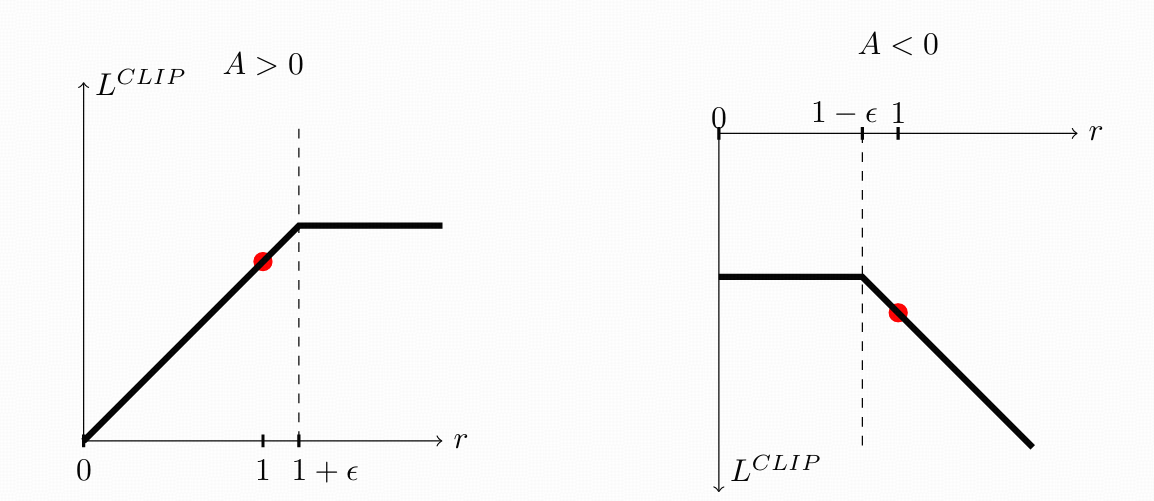




### Group Relative Policy Optimization (GRPO)

GRPO 目标函数:
$$
\begin{aligned}
\mathcal{J}_{\mathrm{GRPO}}(\theta)=\mathbb{E}_{[q \sim P(Q),\left\{o_{i}\right\}_{i=1}^{G} \sim \pi_{\theta_{\mathrm{old}}}(O \mid q)]} 
& \left[
\frac{1}{G} \sum_{i=1}^{G} \frac{1}{\left|o_{i}\right|} \sum_{t=1}^{\left|o_{i}\right|}
\left\{
\min \left[
\frac{\pi_{\theta}\left(o_{i, t} \mid q, o_{i,<t}\right)}{\pi_{\theta_{\mathrm{old}}}\left(o_{i, t} \mid q, o_{i,<t}\right)} \hat{A}_{i, t},\ 
\operatorname{clip} \left(
\frac{\pi_{\theta}\left(o_{i, t} \mid q, o_{i,<t}\right)}{\pi_{\theta_{\mathrm{old}}}\left(o_{i, t} \mid q, o_{i,<t}\right)}, 1-\varepsilon, 1+\varepsilon
\right) \hat{A}_{i, t}
\right] -\ \beta\ \mathbb{D}_{\mathrm{KL}} \left[ \pi_{\theta} \| \pi_{\mathrm{ref}} \right]
\right\}
\right]
\end{aligned}
$$
其中, 
$$
\mathbb{D}_{\mathrm{KL}} \left( \pi_{\theta} \mid \pi_{\mathrm{ref}} \right) = \frac{\pi_{\mathrm{ref}} \left( o_{i} \mid q \right)}{\pi_{\theta} \left( o_{i} \mid q \right)} - \log \frac{\pi_{\mathrm{ref}} \left( o_{i} \mid q \right)}{\pi_{\theta} \left( o_{i} \mid q \right)} - 1
$$
一定要区分开 old policy 和 reference policy, 每一个 iteration 里面会用 old policy 对整个数据集的 query 进行采样, 每一个 iteration 里的每一个 step 会用上式基于 old policy 更新参数 $\mu$ 次, 在整个 iteration 结束后, 将最新的 policy 更新为 old policy 进入下一个 iteration. 而 reference model 全程不做任何变化, 仅参与 KL 散度的计算.



#### 结果监督的 GRPO

对于一个 query $q$, 我们会从旧策略 $\pi_{\theta_{\mathrm{old}}}$ 采样 $G$ 个输出 $\{o_1, \ o_2,\ \cdots,\ o_G\}$. reward model 会对这 $G$ 个回答进行打分 $\mathbf{r}\ =\ \{r_1,\ r_2,\ \cdots,r_G\}$, 对每一个 $o_i$, 将每一个 token 的 advantage 都设置为:
$$
\hat{A}_{i,t} = \tilde{r}_{i} = \frac{r_{i} - mean(\mathbf{r})}{std(\mathbf{r})}
$$